In [60]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import  pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
datos = pd.read_csv("/content/drive/MyDrive/csv pro/basefinal.csv")
datos = datos.drop_duplicates()
datos = datos.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)
datos = datos.drop([14464],axis=0)
datosrank = datos.drop(datos[datos['elo']=="unrancked"].index)
datossinrank = datos.drop(datos[datos['elo']!="unrancked"].index)
datosrank

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,elo,championName,win,kills,assists,deaths,individualPosition,totalMinionsKilled,goldEarned,dragonKills,...,damageDealtToBuildings,damageDealtToObjectives,detectorWardsPlaced,inhibitorTakedowns,neutralMinionsKilled,wardsKilled,wardsPlaced,visionScore,summoner2Id,summoner1Id
0,DIAMOND IV,Ornn,True,3,6,5,TOP,133,9363,0,...,4010,17599,1,1,4,8,9,26,12,4
1,DIAMOND III,FiddleSticks,True,1,12,3,JUNGLE,36,10480,1,...,775,19359,4,1,128,12,4,61,4,11
2,PLATINUM II,Syndra,True,9,7,5,MIDDLE,189,13537,0,...,3510,8377,0,1,4,6,9,18,4,12
3,DIAMOND III,Tristana,True,9,4,4,BOTTOM,203,14368,0,...,11702,19619,4,1,20,10,11,34,7,4
4,DIAMOND IV,Taric,True,1,15,2,UTILITY,37,7650,0,...,486,1611,3,1,0,8,23,43,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14447,BRONZE III,Yone,False,7,7,6,MIDDLE,221,15057,0,...,7886,25587,1,0,13,1,7,23,4,14
14448,GOLD IV,Twitch,False,15,12,10,BOTTOM,97,14427,0,...,617,3545,1,0,17,0,13,27,14,4
14449,IRON IV,Velkoz,False,7,14,12,UTILITY,75,11902,1,...,2341,5303,0,0,12,3,4,12,14,4
14451,IRON III,Zeri,False,9,8,4,MIDDLE,122,12310,0,...,66,733,2,0,1,1,13,39,14,4


#bottom

In [61]:
datosrank["elo"] = (datosrank["elo"]
                .str.replace("[ IV]",""))
                
elo = datosrank["elo"].to_list() 
elo = set(elo)
print(elo)
(datosrank
  .groupby("elo")
  .agg(frequency=("elo", "count")))

{'PLATNUM', 'DAMOND', 'BRONZE', 'GOLD', 'RON', 'MASTER', 'SLER', 'CHALLENGER', 'GRANDMASTER'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,frequency
elo,
BRONZE,2165
CHALLENGER,62
DAMOND,2283
GOLD,2794
GRANDMASTER,168
MASTER,800
PLATNUM,2149
RON,669
SLER,2344


In [62]:
rank_bottom = datosrank.drop(datosrank[datosrank['individualPosition']!="BOTTOM"].index)
rank_bottom = rank_bottom.drop(['individualPosition','win','summoner2Id','summoner1Id','wardsPlaced','wardsKilled','neutralMinionsKilled','detectorWardsPlaced','championName'], axis=1)
rank_bottom

,elo,kills,assists,deaths,totalMinionsKilled,goldEarned,dragonKills,totalDamageDealtToChampions,totalDamageTaken,turretTakedowns,baronKills,damageDealtToBuildings,damageDealtToObjectives,inhibitorTakedowns,visionScore
3,DAMOND,9,4,4,203,14368,0,21371,17593,4,1,11702,19619,1,34
8,PLATNUM,2,5,5,172,9678,0,13952,19185,0,0,2001,6833,0,13
13,PLATNUM,8,5,9,232,13679,0,24891,26924,0,0,1735,13505,0,28
18,DAMOND,10,16,5,192,14856,1,35212,15275,4,1,7715,16507,0,14
23,DAMOND,0,2,6,129,5788,0,7863,9983,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14423,SLER,2,13,2,99,9073,0,12036,8863,4,0,5388,10097,2,13
14428,BRONZE,5,1,8,120,7929,0,9898,15401,0,0,2068,5860,0,8
14438,RON,16,10,5,178,16514,1,44788,23680,4,0,7420,17898,2,14
14443,SLER,14,12,12,123,15496,0,22057,27651,7,0,10034,21195,2,19


definimos las categorias

In [63]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
y = rank_bottom.iloc[:,0]
x = rank_bottom.iloc[:,1:15]
X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=0.8,random_state=0)
target_names = list(set(y))
feature_names = list(x.columns.values)
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")


In [64]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)


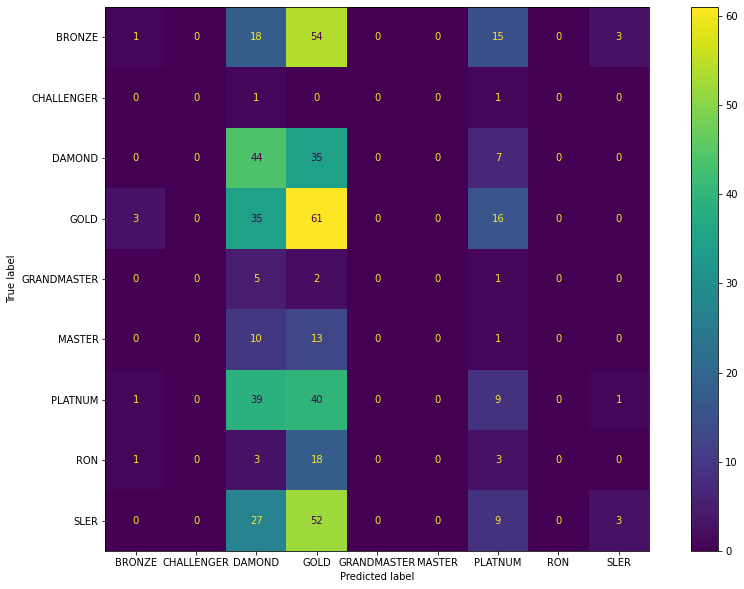

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(Y_test, pred, ax=ax)


In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
y = rank_bottom.iloc[:,0]
x = rank_bottom.iloc[:,1:21]
x_std=std.fit_transform(x)
len(x_std)

2656

In [67]:
from sklearn.model_selection import train_test_split

y = rank_bottom.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x_std,y,train_size=0.8,random_state=0)

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag", max_iter=500000, random_state=0, multi_class="multinomial")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

array([[[364,  77],
        [ 52,  39]],

       [[530,   0],
        [  2,   0]],

       [[338, 108],
        [ 41,  45]],

       [[308, 109],
        [ 73,  42]],

       [[524,   0],
        [  8,   0]],

       [[508,   0],
        [ 24,   0]],

       [[408,  34],
        [ 79,  11]],

       [[506,   1],
        [ 24,   1]],

       [[391,  50],
        [ 76,  15]]])

0.287593984962406

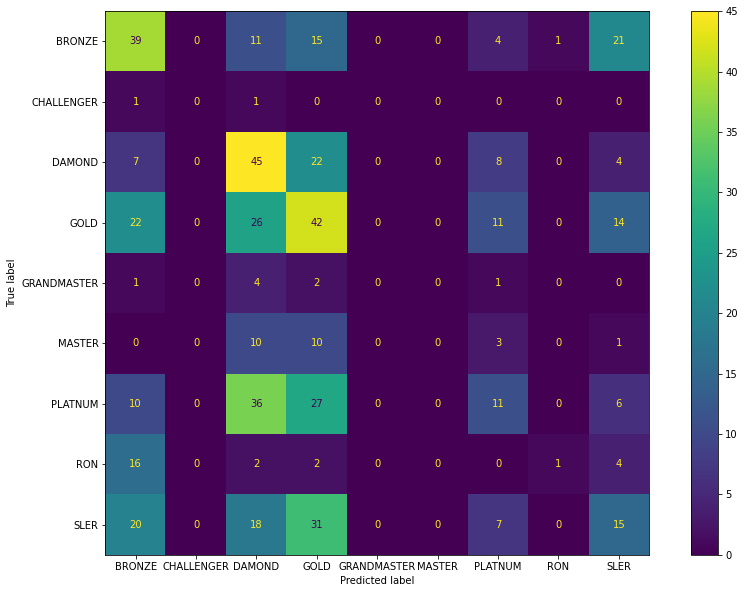

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred,ax=ax)
accuracy_score(Y_test,Y_pred)

In [71]:
meanaverage = np.asarray((X_train).mean(axis=0)).ravel()
feature_names = rank_bottom.columns
feature_names
lr.coef_

array([[-0.45123253, -0.24979836, -0.11918162, -1.63835645,  2.2339193 ,
         0.21164381, -0.56248293,  0.69269337, -0.38833856, -0.070605  ,
         0.35358194, -0.37649351,  0.13876445, -0.42019577],
       [-0.072896  ,  0.35062455, -0.56914712,  0.69742487, -0.70248027,
        -0.68354261,  0.54040254, -0.42552237,  0.81792286, -0.35153425,
        -0.38356687, -0.01284195, -0.50310306,  0.43157947],
       [ 0.73408042,  0.07833626,  0.29055898,  1.21560496, -1.80258541,
        -0.02275753,  0.20559026, -0.35505981, -0.1059288 ,  0.04651739,
        -0.03335772,  0.28538361,  0.12958434,  0.14865849],
       [ 0.09687035, -0.00534054, -0.02126602,  0.03404166, -0.21089301,
         0.03367581, -0.02772764,  0.30859091, -0.01920001, -0.01454846,
        -0.08502185,  0.06180188,  0.04966278,  0.14599791],
       [-0.29099348, -0.05674238,  0.51996056,  0.4702536 , -0.3282556 ,
         0.1396622 ,  0.67495785, -1.218391  ,  0.040476  ,  0.15828767,
         0.25439192, -0.10

top 5 keywords per class:
                       PLATNUM                   DAMOND              BRONZE  \
0             totalDamageTaken  damageDealtToObjectives  inhibitorTakedowns   
1  totalDamageDealtToChampions       inhibitorTakedowns  totalMinionsKilled   
2              turretTakedowns       totalMinionsKilled          baronKills   
3                      assists                  assists    totalDamageTaken   
4                   goldEarned              dragonKills         dragonKills   

                          GOLD                          RON  \
0             totalDamageTaken           totalMinionsKilled   
1  totalDamageDealtToChampions           inhibitorTakedowns   
2                        kills                   baronKills   
3              turretTakedowns      damageDealtToObjectives   
4                   goldEarned  totalDamageDealtToChampions   

                   MASTER                         SLER  \
0                  deaths                       deaths   
1   

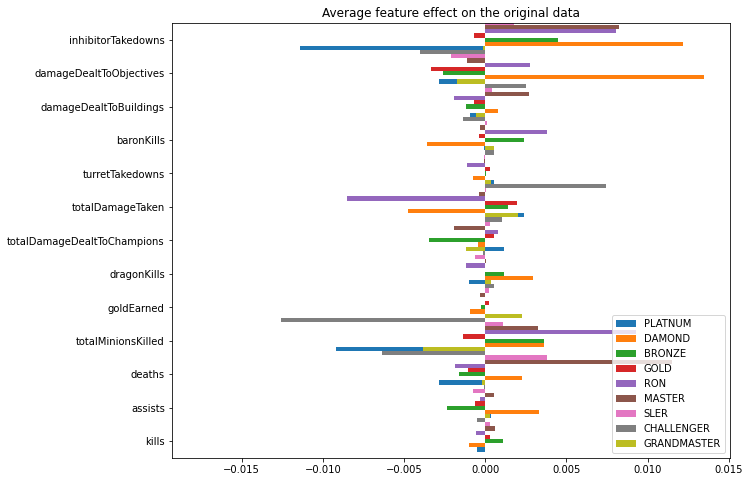

In [128]:
import pandas as pd
import numpy as np


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = lr.coef_ * meanaverage

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")


#top

In [ ]:
rank_top = datosrank.drop(datosrank[datosrank['individualPosition']!="TOP"].index)
rank_top = rank_top.drop(['individualPosition','win','summoner2Id','summoner1Id','wardsPlaced','wardsKilled','neutralMinionsKilled','detectorWardsPlaced','championName'], axis=1)
rank_top

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
y = rank_top.iloc[:,0]
x = rank_top.iloc[:,1:21]
x_std=std.fit_transform(x)
len(x_std)

2655

In [86]:
from sklearn.model_selection import train_test_split

y = rank_top.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x_std,y,train_size=0.8,random_state=0)

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag", max_iter=500000, random_state=0, multi_class="multinomial")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

0.263653483992467

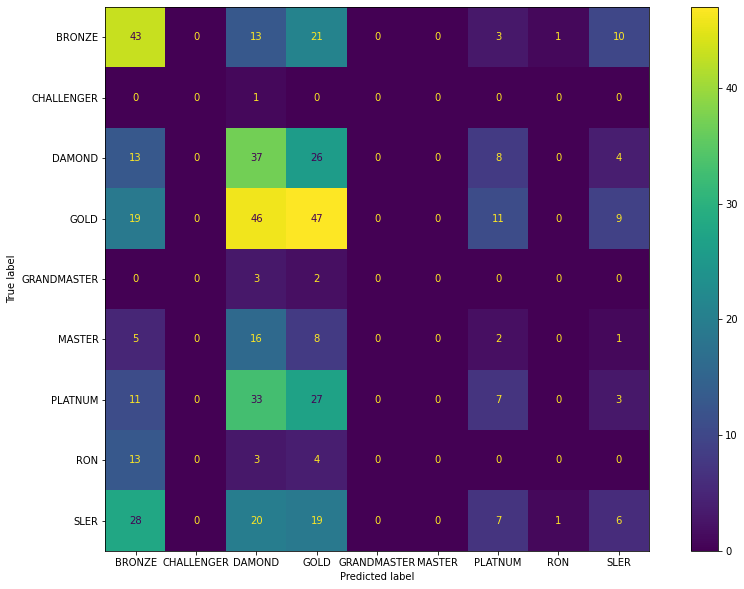

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred,ax=ax)
accuracy_score(Y_test,Y_pred)

In [89]:
meanaverage = np.asarray((X_train).mean(axis=0)).ravel()
feature_names = rank_bottom.columns
feature_names
lr.coef_

array([[-5.95368069e-01, -1.45174651e-01,  1.12642826e-01,
        -1.66156755e+00,  1.80596994e+00, -3.45527846e-02,
         4.66347355e-02,  6.45440648e-02, -9.09763682e-02,
         1.08168756e-01,  1.46870661e-01,  7.30583002e-02,
        -1.59476415e-03, -3.94049182e-01],
       [-2.15725206e-01, -2.25084056e-01, -3.67128833e-01,
         4.78482131e-01,  3.81559803e-01,  2.03178688e-01,
         1.23249793e-01, -1.33674798e-02,  4.36537776e-01,
        -2.73304671e-01, -6.15467817e-01,  3.62735510e-02,
         1.01263142e-02,  1.82965023e-01],
       [ 5.87689332e-01,  2.61605103e-01,  2.90648643e-01,
         1.19875652e+00, -1.87731893e+00, -1.22121519e-01,
        -7.11765648e-02, -1.29405769e-01,  4.72285296e-02,
        -5.80956780e-02,  1.14789351e-01,  1.89850397e-01,
         2.95635342e-02,  1.58266706e-01],
       [ 8.68119680e-02,  9.39087176e-02,  1.24816819e-01,
         6.01655606e-02, -9.90908037e-02,  6.32946717e-03,
         5.28424641e-02, -1.31706234e-01, -1.

top 5 keywords per class:
                       PLATNUM              DAMOND                  BRONZE  \
0           totalMinionsKilled  totalMinionsKilled                 assists   
1                       deaths  inhibitorTakedowns                     elo   
2                      assists     turretTakedowns                   kills   
3                   baronKills          goldEarned  damageDealtToBuildings   
4  totalDamageDealtToChampions         dragonKills      inhibitorTakedowns   

                     GOLD                          RON              MASTER  \
0  damageDealtToBuildings                          elo               kills   
1                 assists           inhibitorTakedowns                 elo   
2                   kills              turretTakedowns  inhibitorTakedowns   
3      inhibitorTakedowns             totalDamageTaken          baronKills   
4                     elo  totalDamageDealtToChampions          goldEarned   

                     SLER           

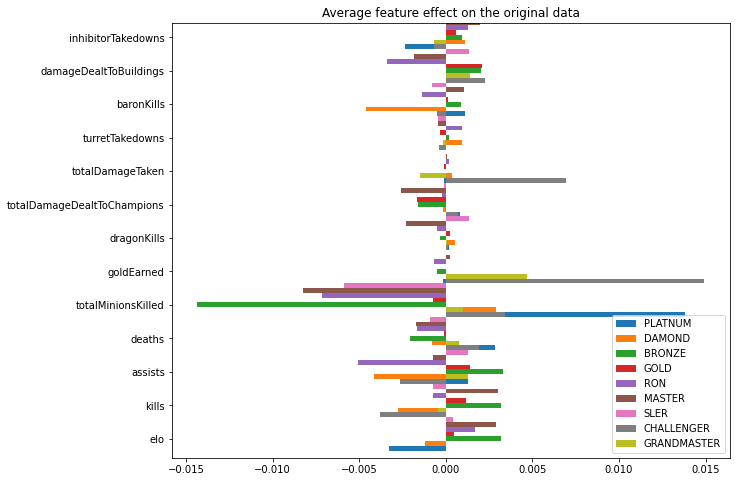

In [90]:
import pandas as pd
import numpy as np


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = lr.coef_ * meanaverage

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")


#mid

In [92]:
rank_mid = datosrank.drop(datosrank[datosrank['individualPosition']!="MIDDLE"].index)
rank_mid = rank_mid.drop(['individualPosition','win','summoner2Id','summoner1Id','wardsPlaced','wardsKilled','neutralMinionsKilled','detectorWardsPlaced','championName'], axis=1)
rank_mid

,elo,kills,assists,deaths,totalMinionsKilled,goldEarned,dragonKills,totalDamageDealtToChampions,totalDamageTaken,turretTakedowns,baronKills,damageDealtToBuildings,damageDealtToObjectives,inhibitorTakedowns,visionScore
2,PLATNUM,9,7,5,189,13537,0,27320,16089,2,0,3510,8377,1,18
7,PLATNUM,7,6,4,156,10799,0,16769,20236,0,0,704,14804,0,25
12,DAMOND,8,3,10,167,15220,0,25418,29645,3,0,7497,16120,0,40
17,PLATNUM,11,24,3,180,14900,0,30619,28056,2,0,1930,11907,1,46
22,PLATNUM,3,1,4,160,8596,0,7993,8243,0,0,594,4404,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14431,BRONZE,10,10,12,88,12691,0,30876,50988,2,0,2936,2936,0,22
14437,BRONZE,13,5,6,143,14615,0,31572,25302,2,0,3518,9551,1,25
14442,RON,10,9,8,134,14311,2,16720,32401,3,1,5587,25694,0,18
14447,BRONZE,7,7,6,221,15057,0,24206,26331,3,0,7886,25587,0,23


In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
y = rank_mid.iloc[:,0]
x = rank_mid.iloc[:,1:21]
x_std=std.fit_transform(x)
len(x_std)

2637

In [96]:
from sklearn.model_selection import train_test_split

y = rank_mid.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x_std,y,train_size=0.8,random_state=0)

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag", max_iter=500000, random_state=0, multi_class="multinomial")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

0.2708333333333333

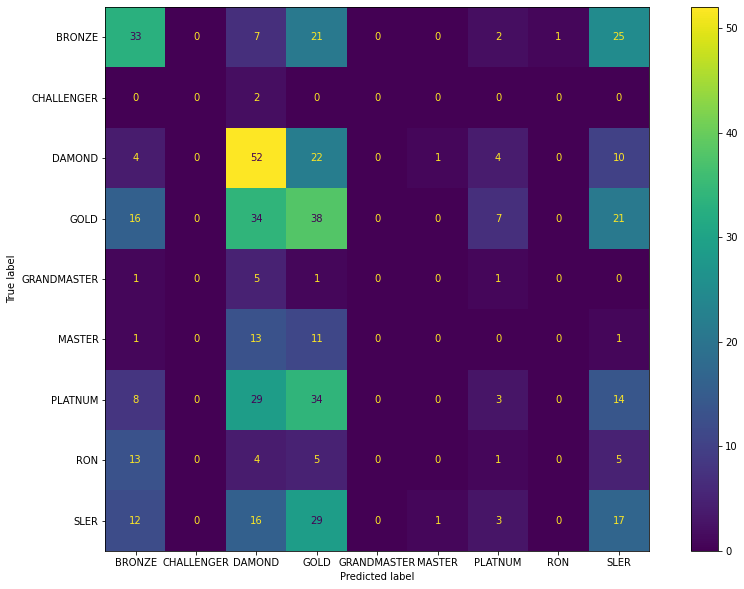

In [98]:
fig, ax = plt.subplots(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred,ax=ax)
accuracy_score(Y_test,Y_pred)

In [99]:
meanaverage = np.asarray((X_train).mean(axis=0)).ravel()
feature_names = rank_bottom.columns
feature_names
lr.coef_

array([[-0.32116859, -0.15301425,  0.21213381, -1.68618319,  1.13538752,
        -0.03170971,  0.14871271,  0.15445064,  0.11355763,  0.0147529 ,
         0.0615478 ,  0.12924167, -0.0287911 ,  0.05340681],
       [ 0.0522976 , -0.38447061, -0.94101188,  0.83570279,  0.20607135,
         0.34041698, -0.67084531,  0.43359309, -0.48212228, -0.1590687 ,
        -0.27414494, -0.34004625,  0.11220165, -0.53910512],
       [ 0.58663992,  0.17645865,  0.18522031,  0.92486545, -1.22236608,
        -0.03999691, -0.11126331, -0.16681182,  0.11622048,  0.11963304,
        -0.20097386,  0.10294637, -0.01948491,  0.22810841],
       [ 0.22379687,  0.06803561,  0.12538392,  0.04931982, -0.40430473,
        -0.06256862,  0.02688645,  0.10873948,  0.15890352, -0.01653645,
        -0.01757408,  0.23606035, -0.06112915,  0.2126116 ],
       [-0.42870171,  0.15341349, -0.21445007,  0.88839115, -0.28235771,
         0.13292382,  0.2691093 , -0.12911042, -0.52079149, -0.3141099 ,
         0.43266324, -0.29

top 5 keywords per class:
                       PLATNUM                       DAMOND  \
0                       deaths              turretTakedowns   
1           totalMinionsKilled       damageDealtToBuildings   
2                   baronKills  totalDamageDealtToChampions   
3                  dragonKills           totalMinionsKilled   
4  totalDamageDealtToChampions                          elo   

               BRONZE                         GOLD                      RON  \
0                 elo                          elo          turretTakedowns   
1  inhibitorTakedowns           inhibitorTakedowns               baronKills   
2               kills              turretTakedowns   damageDealtToBuildings   
3             assists  totalDamageDealtToChampions              dragonKills   
4          goldEarned                        kills  damageDealtToObjectives   

               MASTER                         SLER              CHALLENGER  \
0                 elo                     

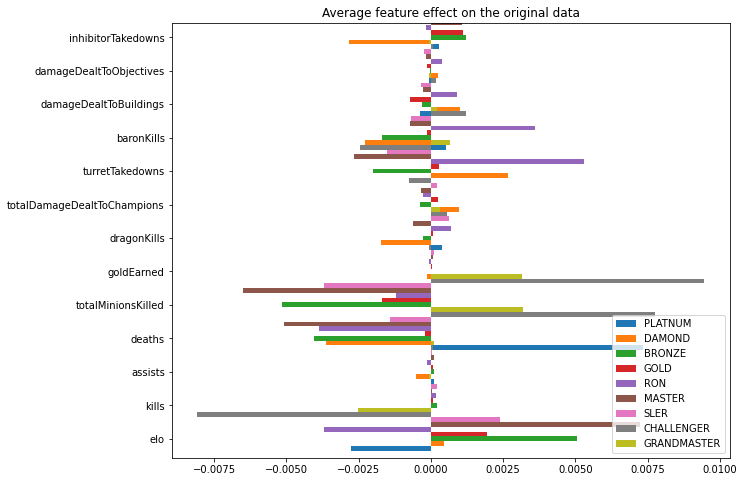

In [100]:
import pandas as pd
import numpy as np


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = lr.coef_ * meanaverage

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

#utility

In [111]:
rank_sup = datosrank.drop(datosrank[datosrank['individualPosition']!="UTILITY"].index)
rank_sup = rank_sup.drop(['individualPosition','win','summoner2Id','summoner1Id','wardsPlaced','wardsKilled','neutralMinionsKilled','detectorWardsPlaced','championName'], axis=1)
rank_sup

,elo,kills,assists,deaths,totalMinionsKilled,goldEarned,dragonKills,totalDamageDealtToChampions,totalDamageTaken,turretTakedowns,baronKills,damageDealtToBuildings,damageDealtToObjectives,inhibitorTakedowns,visionScore
4,DAMOND,1,15,2,37,7650,0,4182,14545,4,0,486,1611,1,43
9,PLATNUM,2,9,1,40,6877,0,8224,18457,0,0,0,1197,0,62
14,PLATNUM,1,14,10,47,7709,0,13267,24305,0,0,465,2960,0,50
19,DAMOND,3,30,5,14,9796,0,12374,17066,4,0,4256,6712,1,77
24,PLATNUM,1,4,7,30,4676,0,3177,12929,0,0,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,BRONZE,0,3,7,34,4985,0,9347,10296,0,0,0,41,0,10
14424,BRONZE,1,15,5,33,6525,0,3363,15296,3,0,3110,3538,1,29
14429,BRONZE,2,5,7,33,6381,0,7829,13462,0,0,224,711,0,18
14439,BRONZE,7,15,8,42,12019,0,24003,20984,1,0,659,4727,1,52


In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
y = rank_sup.iloc[:,0]
x = rank_sup.iloc[:,1:21]
x_std=std.fit_transform(x)
len(x_std)

2644

In [113]:
from sklearn.model_selection import train_test_split

y = rank_sup.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x_std,y,train_size=0.8,random_state=0)

In [114]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag", max_iter=500000, random_state=0, multi_class="multinomial")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

0.2835538752362949

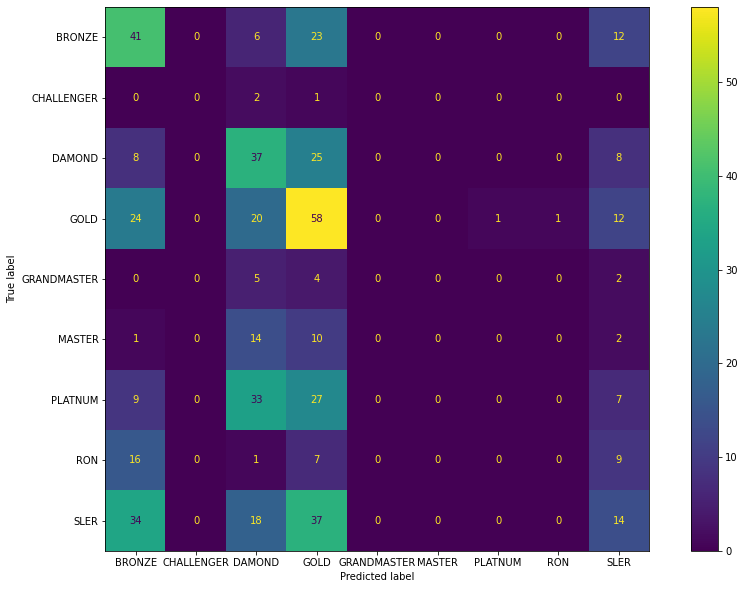

In [115]:
fig, ax = plt.subplots(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred,ax=ax)
accuracy_score(Y_test,Y_pred)

In [116]:
meanaverage = np.asarray((X_train).mean(axis=0)).ravel()
feature_names = rank_bottom.columns
feature_names
lr.coef_

array([[-2.23698557e-01, -1.97019946e-01, -6.21987989e-02,
         1.18950994e-01,  9.60147219e-01,  6.91861740e-02,
         1.97983442e-01,  2.44514377e-01, -1.54221969e-01,
         1.11854469e-01,  8.28129798e-03,  6.36594179e-02,
         1.22581720e-01, -1.22007425e+00],
       [ 1.86965856e-01, -3.78128853e-01, -5.38642548e-01,
        -9.47612251e-02, -3.78066514e-01, -4.32535552e-01,
        -5.66287719e-01, -9.23280378e-02,  3.10323238e-01,
        -1.47121781e-01,  3.74454510e-01, -5.22776957e-02,
        -5.78367375e-01,  1.30377268e+00],
       [ 2.67149541e-01,  4.19105883e-01,  3.79650510e-01,
         6.77686562e-02, -3.78990781e-01, -1.21898635e-01,
        -2.22106022e-01, -7.17326835e-01, -9.31705946e-02,
         1.08292288e-02, -2.47838605e-01,  7.63247295e-02,
         1.11319024e-01,  4.76976544e-01],
       [ 9.81212546e-02,  1.16105553e-01,  9.82324661e-02,
         4.38985731e-02,  1.43910062e-01,  1.01988756e-01,
        -4.91738414e-05,  1.14455070e-01, -1.

top 5 keywords per class:
                       PLATNUM                   DAMOND              BRONZE  \
0             totalDamageTaken  damageDealtToObjectives  inhibitorTakedowns   
1  totalDamageDealtToChampions       inhibitorTakedowns  totalMinionsKilled   
2              turretTakedowns       totalMinionsKilled          baronKills   
3                      assists                  assists    totalDamageTaken   
4                   goldEarned              dragonKills         dragonKills   

                          GOLD                          RON  \
0             totalDamageTaken           totalMinionsKilled   
1  totalDamageDealtToChampions           inhibitorTakedowns   
2                        kills                   baronKills   
3              turretTakedowns      damageDealtToObjectives   
4                   goldEarned  totalDamageDealtToChampions   

                   MASTER                         SLER  \
0                  deaths                       deaths   
1   

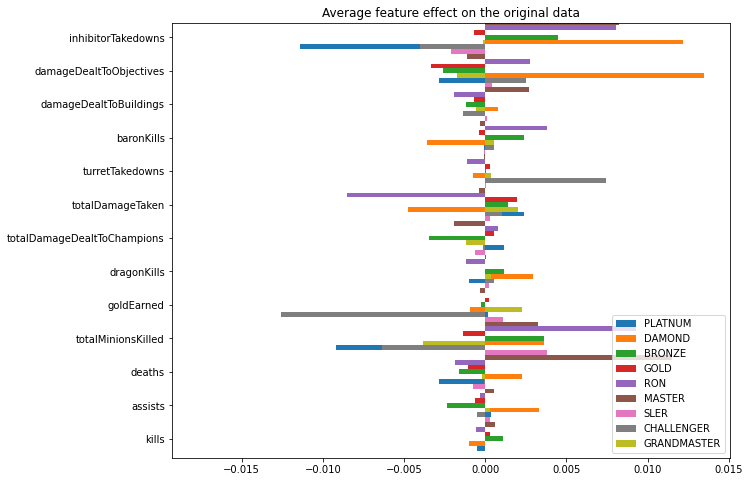

In [117]:
import pandas as pd
import numpy as np


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = lr.coef_ * meanaverage

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

#jungle

In [121]:
rank_jun = datosrank.drop(datosrank[datosrank['individualPosition']!="JUNGLE"].index)
rank_jun = rank_jun.drop(['individualPosition','win','summoner2Id','summoner1Id','wardsPlaced','wardsKilled','neutralMinionsKilled','detectorWardsPlaced','championName'], axis=1)
rank_jun

,elo,kills,assists,deaths,totalMinionsKilled,goldEarned,dragonKills,totalDamageDealtToChampions,totalDamageTaken,turretTakedowns,baronKills,damageDealtToBuildings,damageDealtToObjectives,inhibitorTakedowns,visionScore
1,DAMOND,1,12,3,36,10480,1,19168,25590,3,0,775,19359,1,61
6,DAMOND,5,3,7,40,11066,1,16829,26855,0,0,3079,16678,0,64
11,PLATNUM,6,11,8,31,11459,3,21963,31953,0,0,37,32709,0,29
16,DAMOND,18,13,6,44,16491,1,25577,35099,4,0,5520,24058,1,81
21,PLATNUM,1,0,3,43,6647,0,3761,20152,0,0,0,4092,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14426,BRONZE,6,5,8,22,9501,2,10913,24775,0,0,0,10956,0,13
14432,RON,6,4,11,54,12364,0,13988,40891,0,0,0,13527,0,25
14435,BRONZE,11,8,4,38,14323,4,35011,38818,3,0,1428,51034,2,21
14441,BRONZE,15,12,4,75,18857,0,43742,43491,4,0,2066,19865,1,22


In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
y = rank_sup.iloc[:,0]
x = rank_sup.iloc[:,1:21]
x_std=std.fit_transform(x)
len(x_std)

2644

In [123]:
from sklearn.model_selection import train_test_split

y = rank_sup.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x_std,y,train_size=0.8,random_state=0)

In [124]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag", max_iter=500000, random_state=0, multi_class="multinomial")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

0.2835538752362949

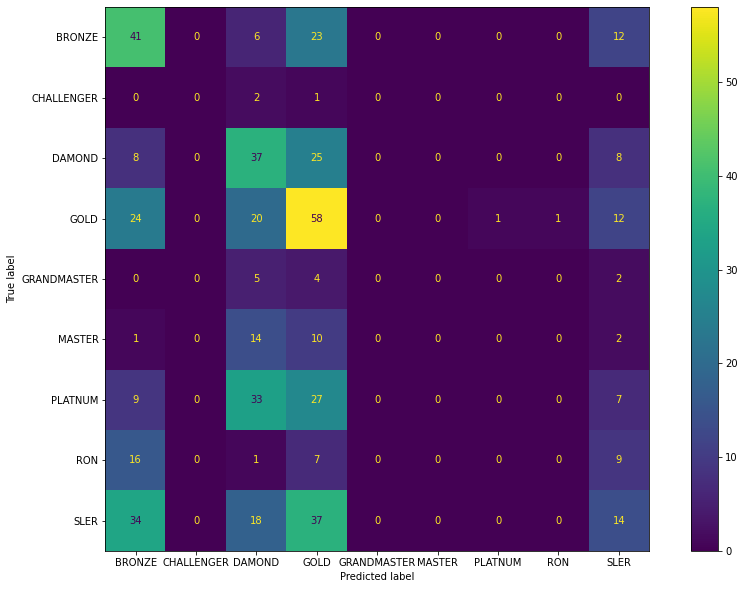

In [125]:
fig, ax = plt.subplots(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred,ax=ax)
accuracy_score(Y_test,Y_pred)

In [126]:
meanaverage = np.asarray((X_train).mean(axis=0)).ravel()
feature_names = rank_bottom.columns
feature_names
lr.coef_

array([[-2.23698557e-01, -1.97019946e-01, -6.21987989e-02,
         1.18950994e-01,  9.60147219e-01,  6.91861740e-02,
         1.97983442e-01,  2.44514377e-01, -1.54221969e-01,
         1.11854469e-01,  8.28129798e-03,  6.36594179e-02,
         1.22581720e-01, -1.22007425e+00],
       [ 1.86965856e-01, -3.78128853e-01, -5.38642548e-01,
        -9.47612251e-02, -3.78066514e-01, -4.32535552e-01,
        -5.66287719e-01, -9.23280378e-02,  3.10323238e-01,
        -1.47121781e-01,  3.74454510e-01, -5.22776957e-02,
        -5.78367375e-01,  1.30377268e+00],
       [ 2.67149541e-01,  4.19105883e-01,  3.79650510e-01,
         6.77686562e-02, -3.78990781e-01, -1.21898635e-01,
        -2.22106022e-01, -7.17326835e-01, -9.31705946e-02,
         1.08292288e-02, -2.47838605e-01,  7.63247295e-02,
         1.11319024e-01,  4.76976544e-01],
       [ 9.81212546e-02,  1.16105553e-01,  9.82324661e-02,
         4.38985731e-02,  1.43910062e-01,  1.01988756e-01,
        -4.91738414e-05,  1.14455070e-01, -1.

top 5 keywords per class:
                       PLATNUM                   DAMOND              BRONZE  \
0             totalDamageTaken  damageDealtToObjectives  inhibitorTakedowns   
1  totalDamageDealtToChampions       inhibitorTakedowns  totalMinionsKilled   
2              turretTakedowns       totalMinionsKilled          baronKills   
3                      assists                  assists    totalDamageTaken   
4                   goldEarned              dragonKills         dragonKills   

                          GOLD                          RON  \
0             totalDamageTaken           totalMinionsKilled   
1  totalDamageDealtToChampions           inhibitorTakedowns   
2                        kills                   baronKills   
3              turretTakedowns      damageDealtToObjectives   
4                   goldEarned  totalDamageDealtToChampions   

                   MASTER                         SLER  \
0                  deaths                       deaths   
1   

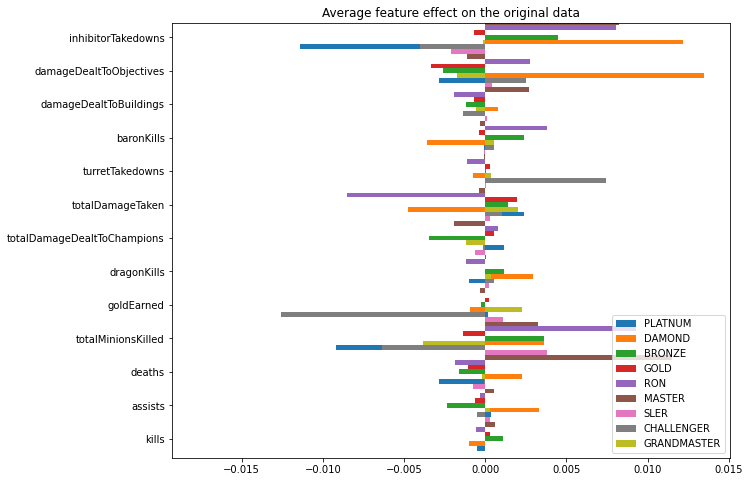

In [127]:
import pandas as pd
import numpy as np


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = lr.coef_ * meanaverage

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")